In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


from dateutil.parser import parse
from datetime import datetime

from math import radians, cos, sin, asin, sqrt

from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
conn = sqlite3.connect("house.db")
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
c.fetchall()

[('houseprice',)]

In [3]:
house = pd.read_sql("SELECT * FROM houseprice;", conn)

house.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  1453602313  20141029T000000   297000.0         2       1.50         1430   
1  2225059214  20140808T000000  1580000.0         4       3.25         4670   
2  2768000270  20140625T000000   562100.0         2       0.75         1440   
3  6819100040  20140624T000000   631500.0         2       1.00         1130   
4  4027700666  20150426T000000   780000.0         4       2.50         3180   

   sqft_lot  floors  waterfront  view  ...  overall_grade  sqft_above  \
0      1650     3.0         0.0     0  ...            7.0        1430   
1     51836     2.0         0.0     0  ...           12.0        4670   
2      3700     1.0         0.0     0  ...            7.0        1200   
3      2640     1.0         0.0     0  ...            8.0        1130   
4      9603     2.0         0.0     2  ...            9.0        3180   

   sqft_basement  year_built  year_renovated  zipcode  latitude  longitude  \
0            0.0        1999               0    98125   47.7222   -122.290   
1            0.0        1988               0    98005   47.6350   -122.164   
2          240.0        1914               0    98107   47.6707   -122.364   
3            0.0        1927               0    98109   47.6438   -122.357   
4            0.0        2002               0    98155   47.7717   -122.277   

   sqft_living15  sqft_lot15  
0           1430        1650  
1           4230       41075  
2           1440        4300  
3           1680        3200  
4           2440       15261  

[5 rows x 21 columns]

# Task 1

In [4]:
# def fill_missing(house):
#     """
#     """
#     print(house.isnull().sum(axis=0))
#     print(house.columns[house.isnull().sum() > 0])
    
#     for col in ['floors', 'waterfront', 'condition', 'overall_grade']:
#         house[col].fillna(house[col].mean(), inplace=True)
    
#     house['sqft_basement'].fillna(0, inplace=True)
    
#     return house
    
# def convert_data(house):
#     """
    
#     """
    
#     parser = lambda x: (datetime.today().date() - parse(x[:8]).date()).days
#     house["sold_time_delta"] = house["date"].apply(parser)
#     house.drop(["date"], axis=1, inplace=True)
    
    
#     loc_space_needle = (47.620810, -122.348565)
#     house["dist_Seattle"] = pd.Series([haversine(loc_space_needle[0], loc_space_needle[1], house["latitude"][i], house["longitude"][i]) 
#                                        for i in range(len(house["latitude"]))])
#     house.drop(["latitude", "longitude"], axis=1, inplace=True)

#     return house
    

# def remove_outliers(house):
#     """
    
#     """
#     TARGET = "price"
#     subplot_scatter(house, TARGET)
#     subplot_box(house, TARGET)
#     house = iqr_drop_missing(house)
#     subplot_scatter(house, TARGET)
#     subplot_box(house, TARGET)
    
#     return house

In [5]:
# def preprocessing(house):
#     house = fill_missing(house)
#     house = convert_data(house)
#     house = remove_outliers(house)
#     return house

# house = preprocessing(house)

## drop unrelated columns

In [6]:
house.drop(["id", "zipcode","date"], axis=1, inplace=True)

## fill_missing

In [7]:
house.isnull().sum(axis=0)

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors            81
waterfront        76
view               0
condition         72
overall_grade     90
sqft_above         0
sqft_basement     70
year_built         0
year_renovated     0
latitude           0
longitude          0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [8]:
house.columns[house.isnull().sum() > 0]

Index(['floors', 'waterfront', 'condition', 'overall_grade', 'sqft_basement'], dtype='object')

In [9]:
for col in ['floors', 'condition', 'overall_grade']:
    house[col].fillna(house[col].mean(), inplace=True)

for col in ['sqft_basement', 'waterfront']:
    house[col].fillna(0, inplace=True)

In [10]:
# date

# parser = lambda x: (datetime.today().date() - parse(x[:8]).date()).days

# house["sold_day_delta"] = house["date"].apply(parser)
# house.drop(["date"], axis=1, inplace=True)


# latitude & longitude

def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r


loc_Columbia_Center = (47.604603, -122.330702)
house["dist_Seattle"] = pd.Series([haversine(loc_Columbia_Center[0], loc_Columbia_Center[1], house["latitude"][i], house["longitude"][i]) for i in range(len(house["latitude"]))])
# house.drop(["latitude", "longitude"], axis=1, inplace=True)


# view & sqft_basement

# for col in ['view', 'sqft_basement']:
for col in ['view']:
    house[col][house[col] > 0] = 1
    # pd.crosstab(index=house[col], columns=col)

# year_renovated

index = house["year_renovated"] == 0
house["year_renovated"][index] = house["year_built"][index]
house["year_renovated"] = 2019 - house["year_renovated"]
house["year_built"] = 2019 - house["year_built"]
house.drop("year_built", axis=1, inplace=True)



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
house

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0       297000.0         2       1.50         1430      1650  3.000000   
1      1580000.0         4       3.25         4670     51836  2.000000   
2       562100.0         2       0.75         1440      3700  1.000000   
3       631500.0         2       1.00         1130      2640  1.000000   
4       780000.0         4       2.50         3180      9603  2.000000   
5       485000.0         3       2.50         1650      3436  2.000000   
6       340000.0         3       2.75         1720     28000  1.000000   
7       335606.0         3       2.50         2538      4600  2.000000   
8       425000.0         4       2.50         2460      5440  2.000000   
9       490000.0         5       3.50         4460      2975  3.000000   
10      732000.0         4       1.75         2360     11300  1.000000   
11      389700.0         3       2.50         1720      3581  2.000000   
12      450000.0         2       1.50         1020      1049  3.000000   
13      357000.0         3       1.50         1340     11744  1.000000   
14      960000.0         4       2.50         3180     10105  2.000000   
15      257000.0         2       1.75         1220      2268  1.000000   
16      448000.0         3       2.25         1530      3056  2.000000   
17      610000.0         4       2.00         2130      2620  1.500000   
18      230950.0         2       1.00          930     12724  1.000000   
19      377500.0         3       2.00         1370      7200  1.000000   
20      375000.0         3       2.50         1670      7740  1.000000   
21      410000.0         4       2.75         2220      8450  1.000000   
22      459000.0         4       3.00         1900      9077  2.000000   
23      190000.0         3       1.75         1100      9452  1.000000   
24      585000.0         4       2.50         2370     15200  1.000000   
25      280000.0         3       1.00         1100      5132  1.000000   
26      500000.0         4       2.00         1530      7816  1.000000   
27      465000.0         4       1.75         1640      7194  1.500000   
28      802000.0         2       1.75         2110      8700  1.000000   
29      440000.0         3       1.50         1690      6010  1.000000   
...          ...       ...        ...          ...       ...       ...   
18341   610000.0         4       2.25         2200      7200  1.000000   
18342   212000.0         3       2.25         1900     18000  1.000000   
18343   250000.0         3       2.25         1560     15340  2.000000   
18344   140000.0         3       1.00         1060      7473  1.000000   
18345   747450.0         3       2.50         2110      1339  2.000000   
18346   382000.0         2       2.50         1650      2710  2.000000   
18347   293000.0         1       1.00         1110      5421  1.000000   
18348   289000.0         2       1.00          780      4132  1.000000   
18349   300000.0         3       1.00          930      5160  1.500000   
18350   699950.0         4       2.00         2070      7830  1.000000   
18351   375000.0         4       2.00         1757     19370  1.493384   
18352   320000.0         3       2.00         1820     17600  1.000000   
18353   269500.0         2       1.00         1140     74052  1.000000   
18354   210000.0         2       1.00         1040      4590  1.000000   
18355   610000.0         4       3.00         2450     10117  1.000000   
18356   717000.0         3       2.50         2480      5137  2.000000   
18357   250000.0         3       1.00         1060     52272  1.000000   
18358   655000.0         5       2.50         2560     46786  2.000000   
18359   415000.0         4       2.50         2544      4071  2.000000   
18360   280300.0         2       1.00          920      5000  1.000000   
18361   339000.0         3       1.75         1150     13278  1.000000   
18362   389000.0         4       2.50         2420      9147  2.000000   
18363   728725.

## remove_outliers

In [12]:
def _scatter(df, feature, target):
    """
    
    """
    #plt.figure(figsize=(16,8))
    plt.scatter(df[feature], df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    
    items = [feature, " vs ", target]
    title = ''.join(items)
    plt.title(title)

    
def subplot_scatter(df, target):
    """
    Plot scatter figures of each column in the dataFrame. 
    Args:
        df: pandas.DataFrame 
            DataFrame input.
            
        target: pandas.Series()
            Target column.
        
    
    """
    
    plt.figure(figsize=(30,90))
    num_subplot = len(df.columns.drop(target))
    for i, col in enumerate(house.columns.drop(target)):
        plt.subplot(num_subplot//2 + 1,2,i+1)
        _scatter(df, col, target)
        
def subplot_box(df):
    """
    
    """
    
    plt.figure(figsize=(30,90))
    num_subplot = len(df.columns)
    for i, col in enumerate(house.columns):
        plt.subplot(num_subplot//2 + 1,2,i+1)
        sns.boxplot(x=df[col])

        
def get_status(x) : 
    return pd.DataFrame([x.median(),x.mad(),x.var(),x.std(),x.skew(),x.kurt()],
                        index=['median','mad','var','std','skew','kurt']).round(3)

     
        
TARGET = "price"

In [13]:
house.describe().round(3)

price   bedrooms  bathrooms  sqft_living     sqft_lot     floors  \
count    18371.000  18371.000  18371.000    18371.000    18371.000  18371.000   
mean    540939.874      3.375      2.115     2082.128    15086.493      1.493   
std     370060.562      0.934      0.769      920.244    40143.679      0.538   
min      75000.000      0.000      0.000      290.000      520.000      1.000   
25%     321000.000      3.000      1.750     1430.000     5046.500      1.000   
50%     450000.000      3.000      2.250     1920.000     7620.000      1.500   
75%     645000.000      4.000      2.500     2550.000    10699.000      2.000   
max    7700000.000     33.000      8.000    13540.000  1164794.000      3.500   

       waterfront       view  condition  overall_grade  sqft_above  \
count   18371.000  18371.000  18371.000      18371.000   18371.000   
mean        0.007      0.100      3.409          7.658    1789.571   
std         0.086      0.299      0.650          1.176     828.351   
min         0.000      0.000      1.000          1.000     290.000   
25%         0.000      0.000      3.000          7.000    1200.000   
50%         0.000      0.000      3.000          7.000    1560.000   
75%         0.000      0.000      4.000          8.000    2210.000   
max         1.000      1.000      5.000         13.000    9410.000   

       sqft_basement  year_renovated   latitude  longitude  sqft_living15  \
count      18371.000       18371.000  18371.000  18371.000      18371.000   
mean         291.667          45.630     47.560   -122.214       1988.427   
std          442.905          28.743      0.138      0.141        688.678   
min            0.000           4.000     47.156   -122.519        399.000   
25%            0.000          20.000     47.470   -122.328       1490.000   
50%            0.000          42.000     47.572   -122.230       1840.000   
75%          560.000          65.000     47.678   -122.125       2360.000   
max         4130.000         119.000     47.778   -121.315       6210.000   

       sqft_lot15  dist_Seattle  
count   18371.000     18371.000  
mean    12808.836        18.020  
std     26805.558        12.872  
min       651.000         1.218  
25%      5100.000         7.390  
50%      7632.000        15.899  
75%     10097.000        24.174  
max    871200.000       113.114

In [14]:
get_status(house)

price  bedrooms  bathrooms  sqft_living      sqft_lot  floors  \
median  4.500000e+05     3.000      2.250     1920.000  7.620000e+03   1.500   
mad     2.350203e+05     0.735      0.614      698.680  1.378652e+04   0.486   
var     1.369448e+11     0.873      0.591   846849.590  1.611515e+09   0.290   
std     3.700606e+05     0.934      0.769      920.244  4.014368e+04   0.538   
skew    4.118000e+00     2.220      0.516        1.500  1.165000e+01   0.621   
kurt    3.656400e+01    56.532      1.370        5.551  2.095400e+02  -0.465   

        waterfront   view  condition  overall_grade  sqft_above  \
median       0.000  0.000      3.000          7.000    1560.000   
mad          0.015  0.179      0.559          0.928     640.480   
var          0.007  0.090      0.423          1.384  686165.526   
std          0.086  0.299      0.650          1.176     828.351   
skew        11.494  2.674      1.031          0.767       1.454   
kurt       130.124  5.151      0.559          1.204       3.488   

        sqft_basement  year_renovated  latitude  longitude  sqft_living15  \
median          0.000          42.000    47.572   -122.230       1840.000   
mad           363.472          23.969     0.115      0.115        538.362   
var        196164.811         826.165     0.019      0.020     474277.365   
std           442.905          28.743     0.138      0.141        688.678   
skew            1.562           0.557    -0.483      0.892          1.120   
kurt            2.421          -0.522    -0.680      1.085          1.645   

          sqft_lot15  dist_Seattle  
median  7.632000e+03        15.899  
mad     1.015886e+04        10.073  
var     7.185379e+08       165.700  
std     2.680556e+04        12.872  
skew    8.803000e+00         1.324  
kurt    1.247340e+02         2.763

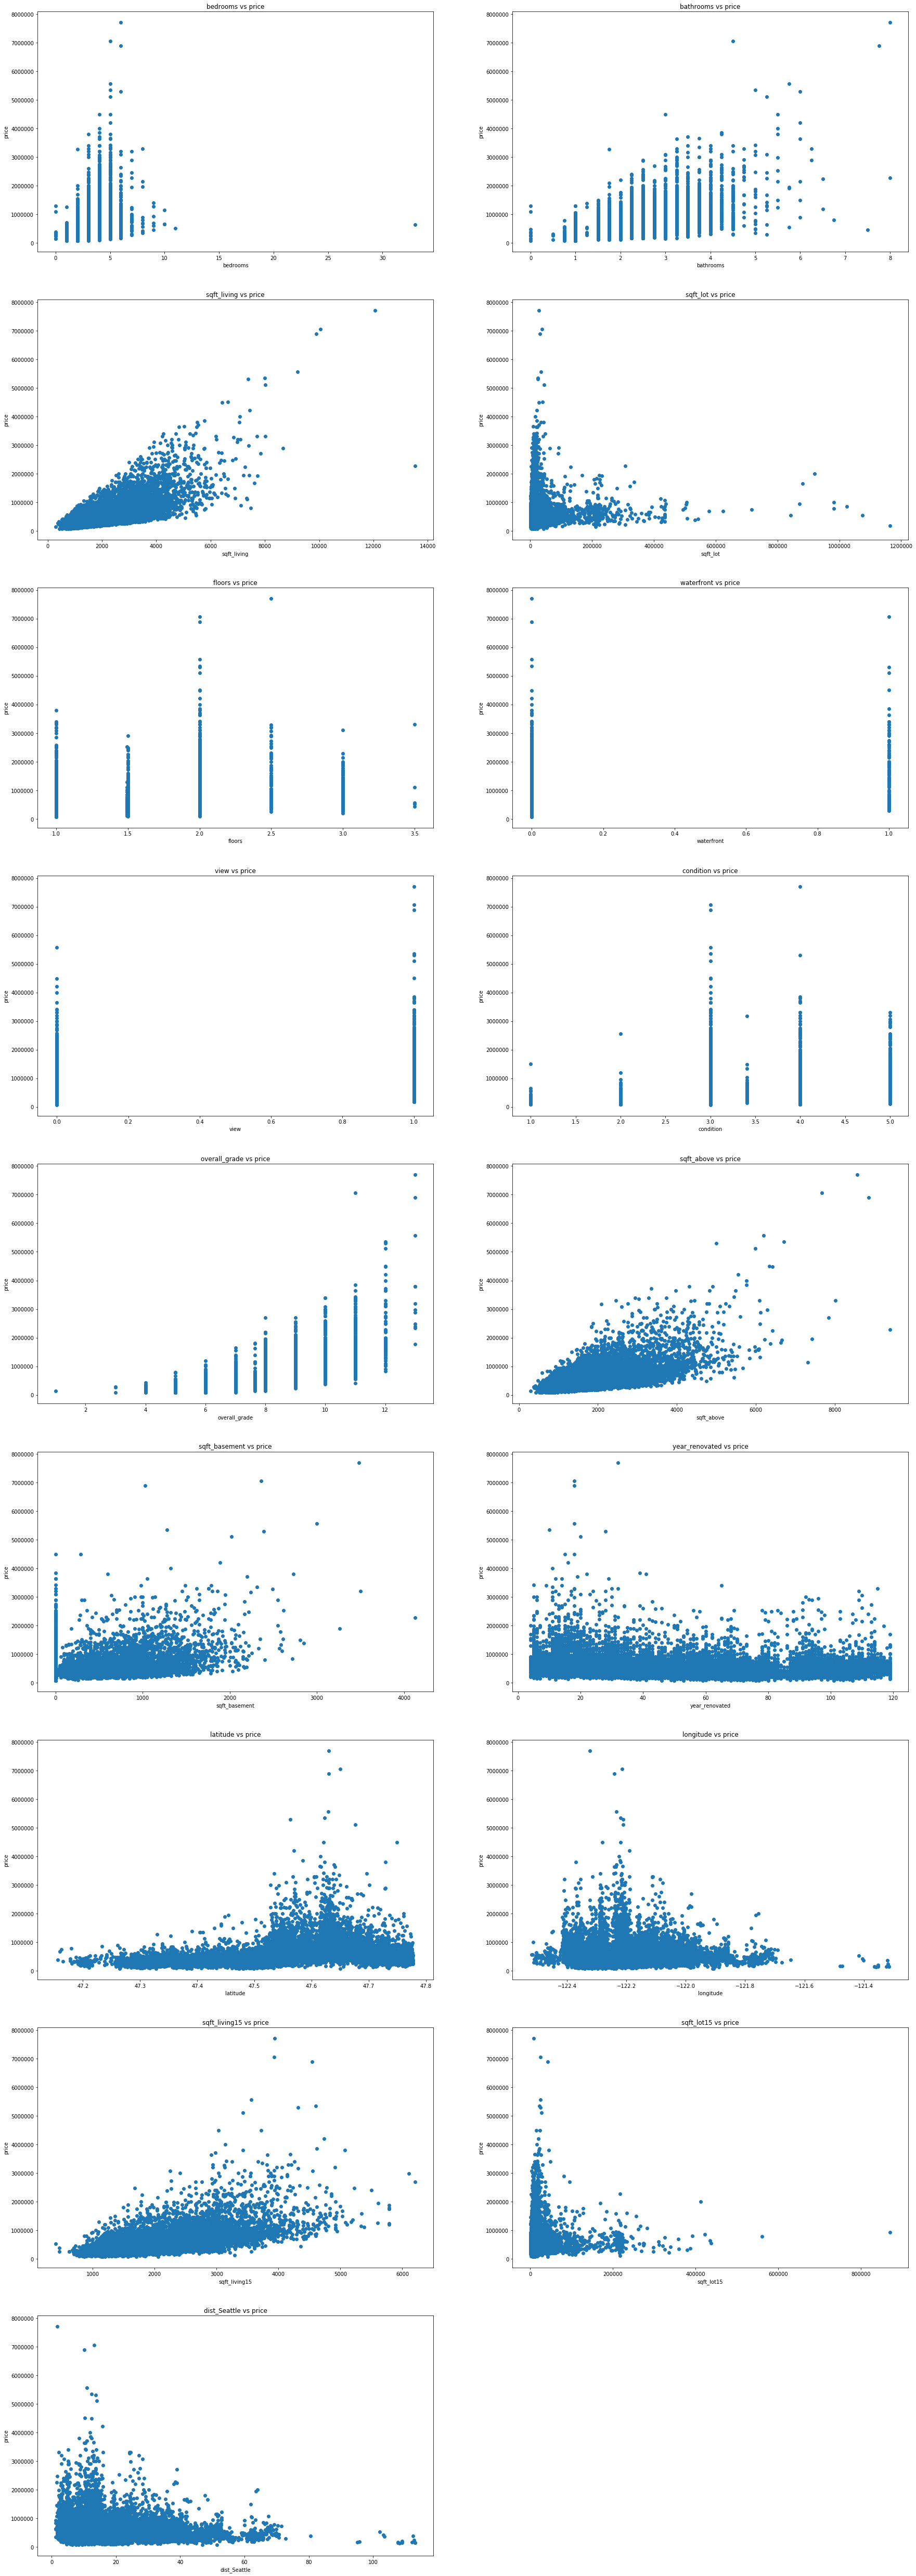

In [15]:
subplot_scatter(house, TARGET)

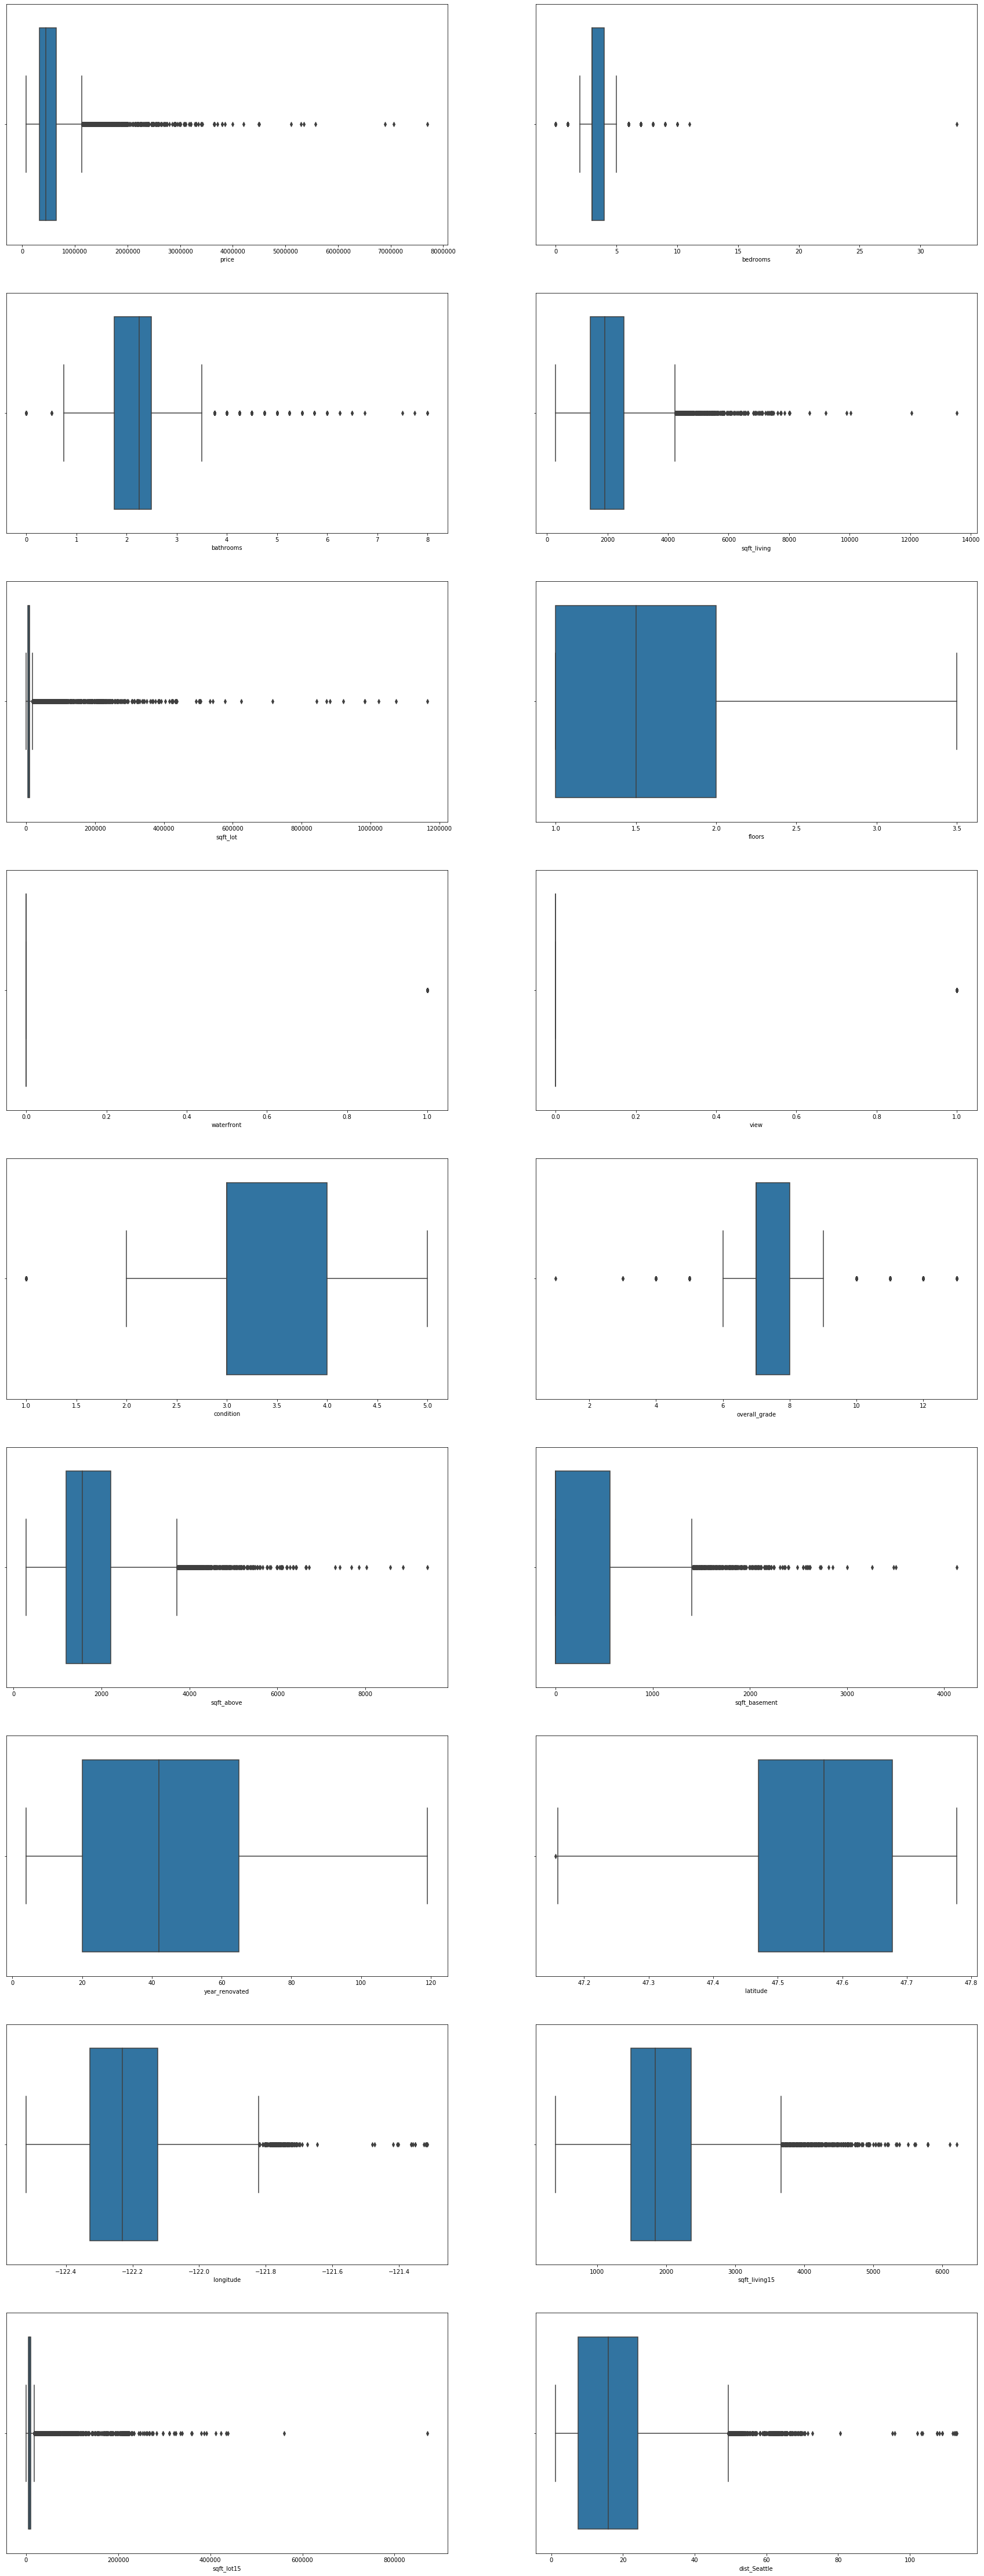

In [16]:
subplot_box(house)

In [17]:
def zscore_drop_missing(df, col_list, THRESHOLD=3):
    """
    """
    for col in col_list:     
        series = df[col]
        z = np.abs(stats.zscore(df[col]))
        df = df[(z < THRESHOLD)]
        
    df.index = range(len(df))
    return df


def naive_drop_missing(df, col_list, THRESHOLD):
    
    for col in col_list:
        p = df["col"].quantile(1-THRESHOLD)
        q = df["col"].quantile(THRESHOLD)
        
        df["col"] = df["col"][df["col"] > p and df["col"] < q]
        
    df.index = range(len(df))
    return df
    

def iqr_drop_missing(df, col_list, THRESHOLD=1.5):
    """
    
    """
    for col in col_list:
        series = df[col]
        print(col)
        temp = len(df)
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((series < (Q1 - THRESHOLD * IQR)) |(series > (Q3 + THRESHOLD * IQR)))]
        df.index = range(len(df))
        print(temp - len(df) )
        
    return df

In [18]:
# numeric 的才 IQR 

# col_list = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors","condition", "sqft_above", 
#              "year_renovated", "sqft_living15", "sqft_living15", "dist_Seattle"]


col_list = house.columns.drop(["waterfront","view"])

house = zscore_drop_missing(house, col_list, THRESHOLD = 3.7)



#house = iqr_drop_missing(house, col_list, 8)

In [19]:
house.describe().round(3)

price   bedrooms  bathrooms  sqft_living    sqft_lot     floors  \
count    17263.000  17263.000  17263.000    17263.000   17263.000  17263.000   
mean    506156.824      3.343      2.067     1997.936    9973.114      1.485   
std     267224.996      0.865      0.711      778.095   11694.238      0.538   
min      80000.000      0.000      0.000      370.000     520.000      1.000   
25%     318000.000      3.000      1.500     1410.000    5000.000      1.000   
50%     443500.000      3.000      2.250     1880.000    7419.000      1.000   
75%     625000.000      4.000      2.500     2475.000   10008.000      2.000   
max    1910000.000      6.000      4.500     5170.000  157875.000      3.000   

       waterfront       view  condition  overall_grade  sqft_above  \
count   17263.000  17263.000  17263.000      17263.000   17263.000   
mean        0.005      0.088      3.416          7.583    1721.402   
std         0.070      0.283      0.644          1.072     727.288   
min         0.000      0.000      2.000          4.000     370.000   
25%         0.000      0.000      3.000          7.000    1180.000   
50%         0.000      0.000      3.000          7.000    1530.000   
75%         0.000      0.000      4.000          8.000    2120.000   
max         1.000      1.000      5.000         11.000    4480.000   

       sqft_basement  year_renovated   latitude  longitude  sqft_living15  \
count      17263.000       17263.000  17263.000  17263.000      17263.000   
mean         275.688          46.201     47.561   -122.223       1938.876   
std          409.620          28.867      0.139      0.131        625.700   
min            0.000           4.000     47.178   -122.512        460.000   
25%            0.000          21.000     47.473   -122.331       1470.000   
50%            0.000          42.000     47.573   -122.242       1810.000   
75%          540.000          65.000     47.680   -122.137       2300.000   
max         1830.000         119.000     47.778   -121.771       4310.000   

       sqft_lot15  dist_Seattle  
count   17263.000     17263.000  
mean     9058.424        17.133  
std      8166.654        11.669  
min       651.000         1.218  
25%      5000.000         7.252  
50%      7500.000        15.365  
75%      9680.000        23.436  
max     69696.000        62.594

In [20]:
get_status(house)  

price  bedrooms  bathrooms  sqft_living      sqft_lot  floors  \
median  4.435000e+05     3.000      2.250     1880.000  7.419000e+03   1.000   
mad     1.988149e+05     0.709      0.586      625.419  5.903146e+03   0.486   
var     7.140920e+10     0.748      0.505   605432.435  1.367552e+08   0.289   
std     2.672250e+05     0.865      0.711      778.095  1.169424e+04   0.538   
skew    1.633000e+00     0.228      0.125        0.698  5.240000e+00   0.652   
kurt    3.784000e+00     0.358     -0.267        0.173  3.928100e+01  -0.444   

        waterfront   view  condition  overall_grade  sqft_above  \
median       0.000  0.000      3.000          7.000    1530.000   
mad          0.010  0.160      0.558          0.866     580.431   
var          0.005  0.080      0.415          1.150  528948.137   
std          0.070  0.283      0.644          1.072     727.288   
skew        14.147  2.910      1.122          0.573       1.002   
kurt       198.157  6.471      0.358          0.639       0.546   

        sqft_basement  year_renovated  latitude  longitude  sqft_living15  \
median          0.000          42.000    47.573   -122.242       1810.000   
mad           344.216          24.101     0.115      0.109        499.136   
var        167788.494         833.280     0.019      0.017     391500.350   
std           409.620          28.867     0.139      0.131        625.700   
skew            1.307           0.518    -0.486      0.673          0.860   
kurt            0.652          -0.565    -0.700     -0.155          0.456   

          sqft_lot15  dist_Seattle  
median  7.500000e+03        15.365  
mad     4.539200e+03         9.401  
var     6.669423e+07       136.162  
std     8.166654e+03        11.669  
skew    3.504000e+00         0.996  
kurt    1.478300e+01         0.632

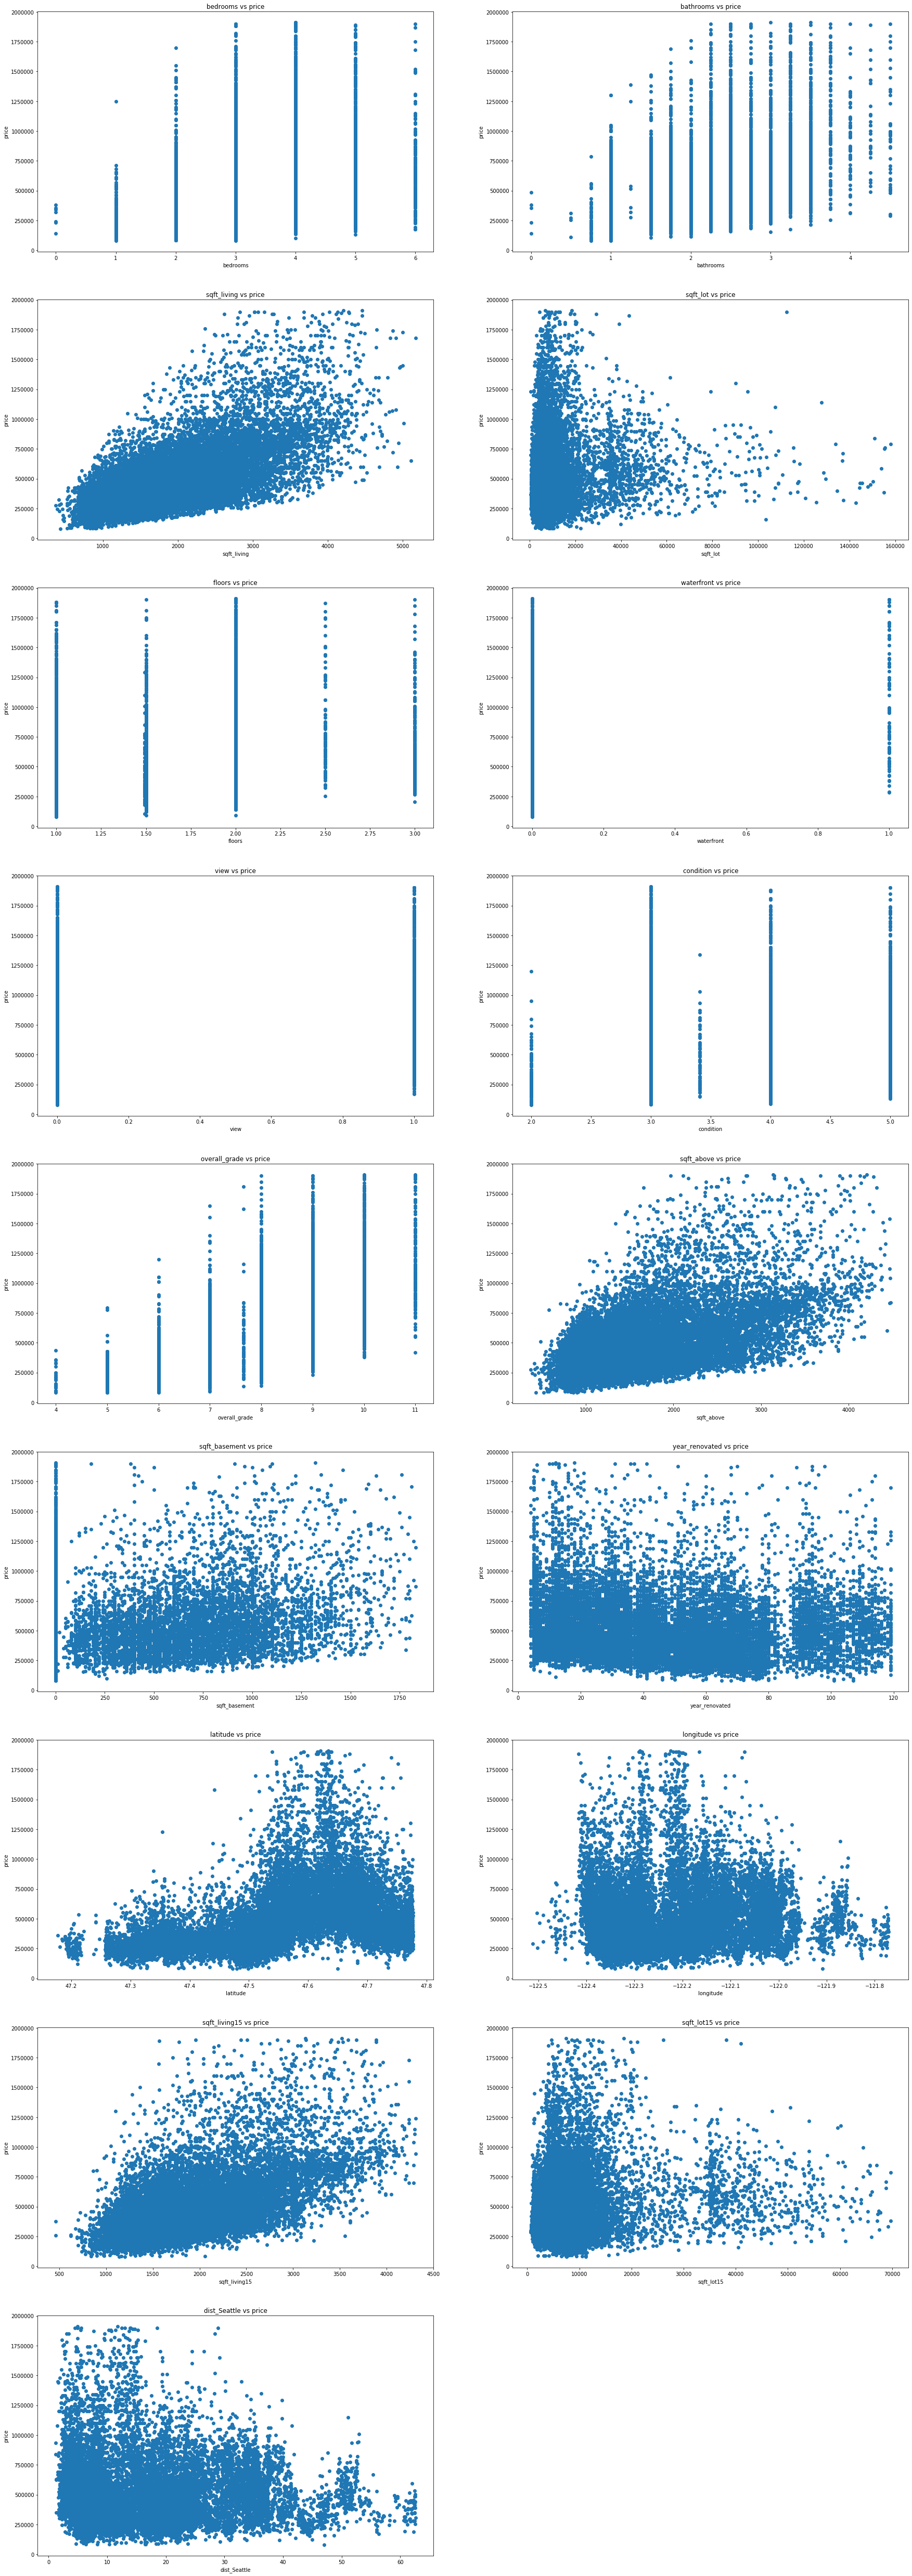

In [21]:
subplot_scatter(house, TARGET)

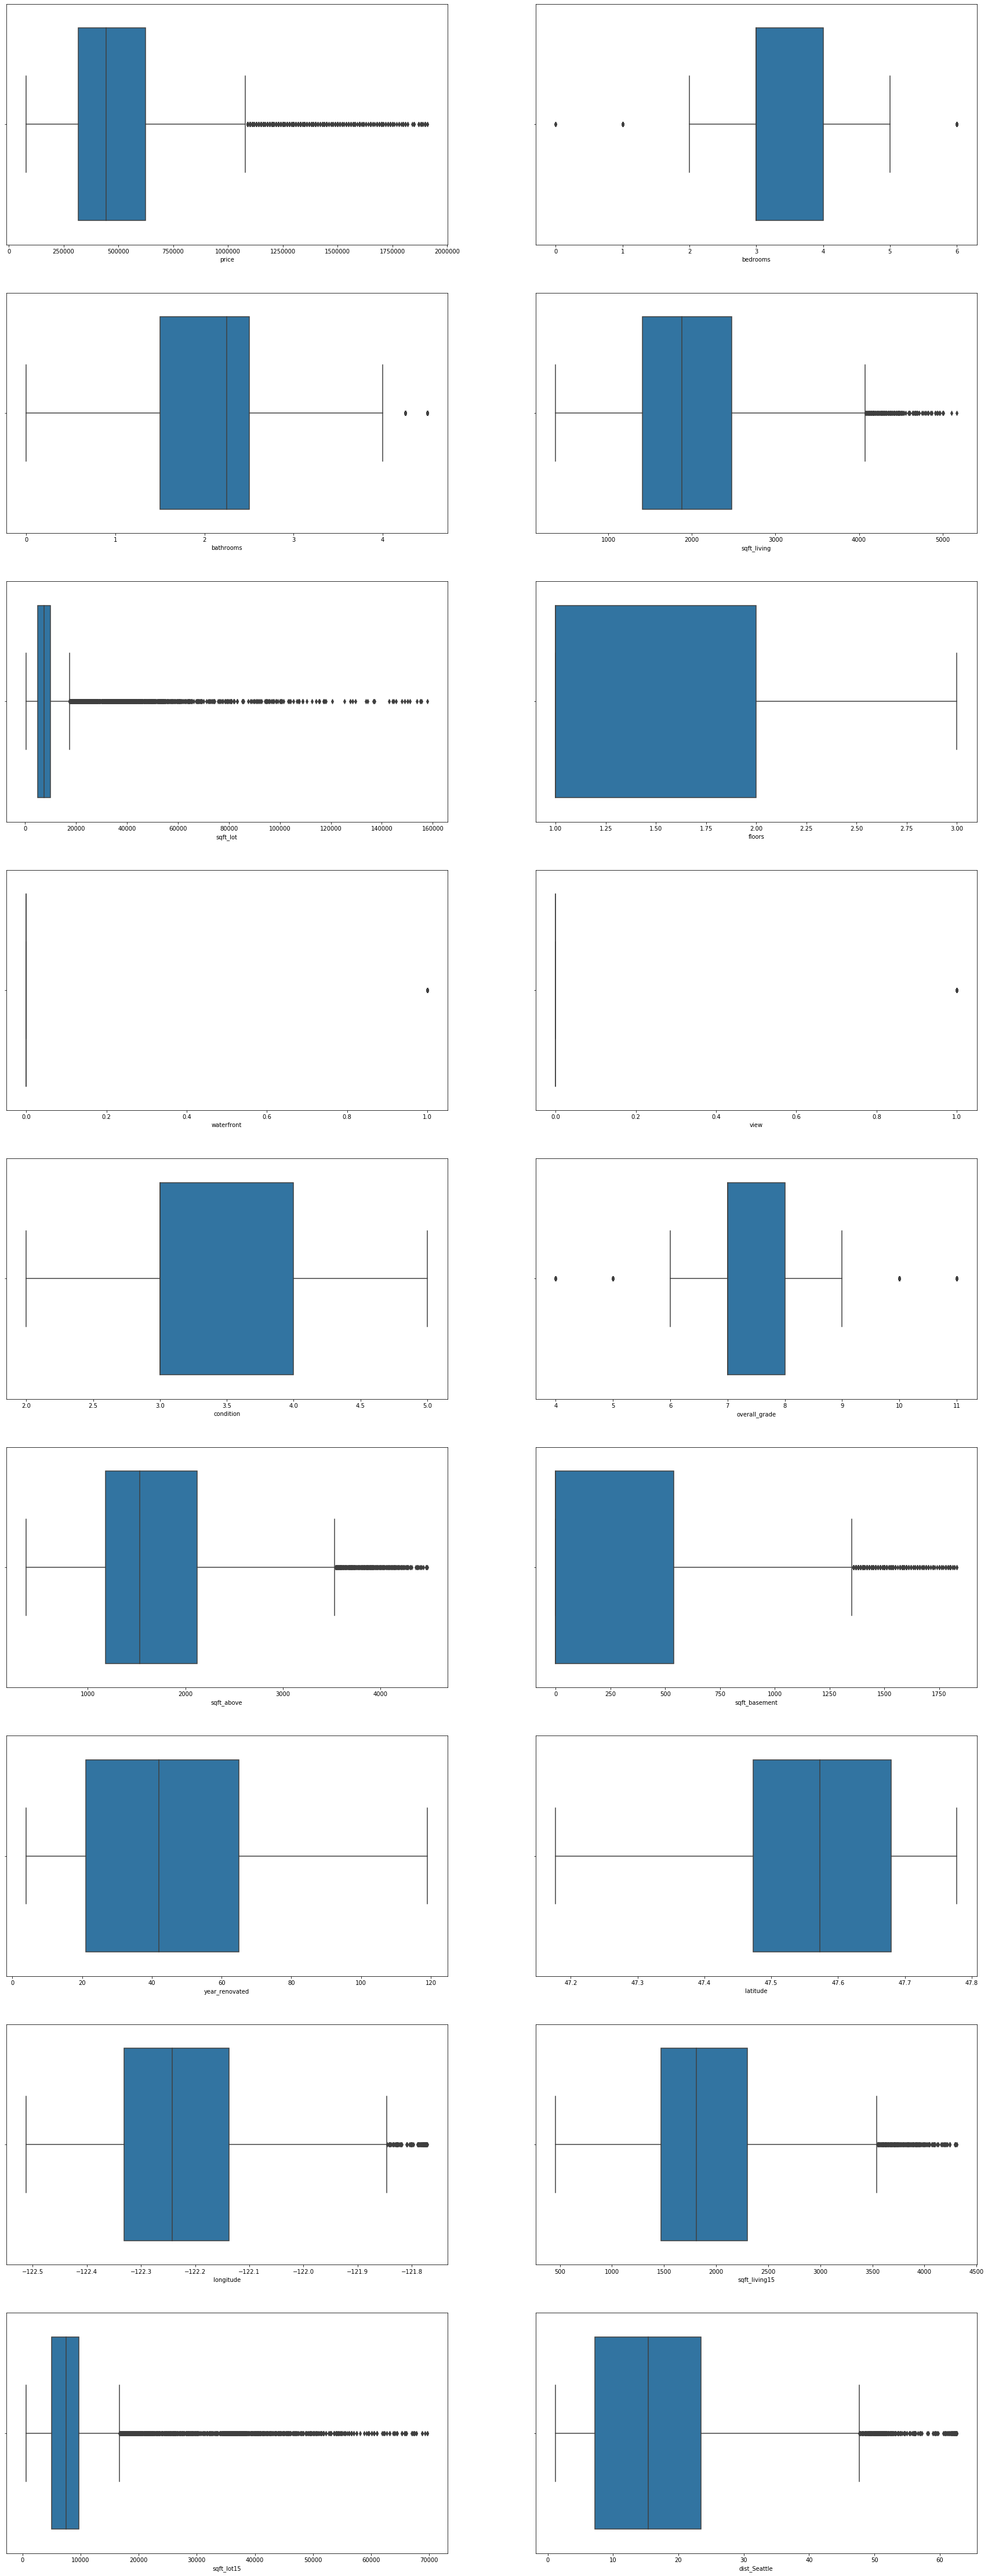

In [22]:
subplot_box(house)

In [23]:
# house.corr()

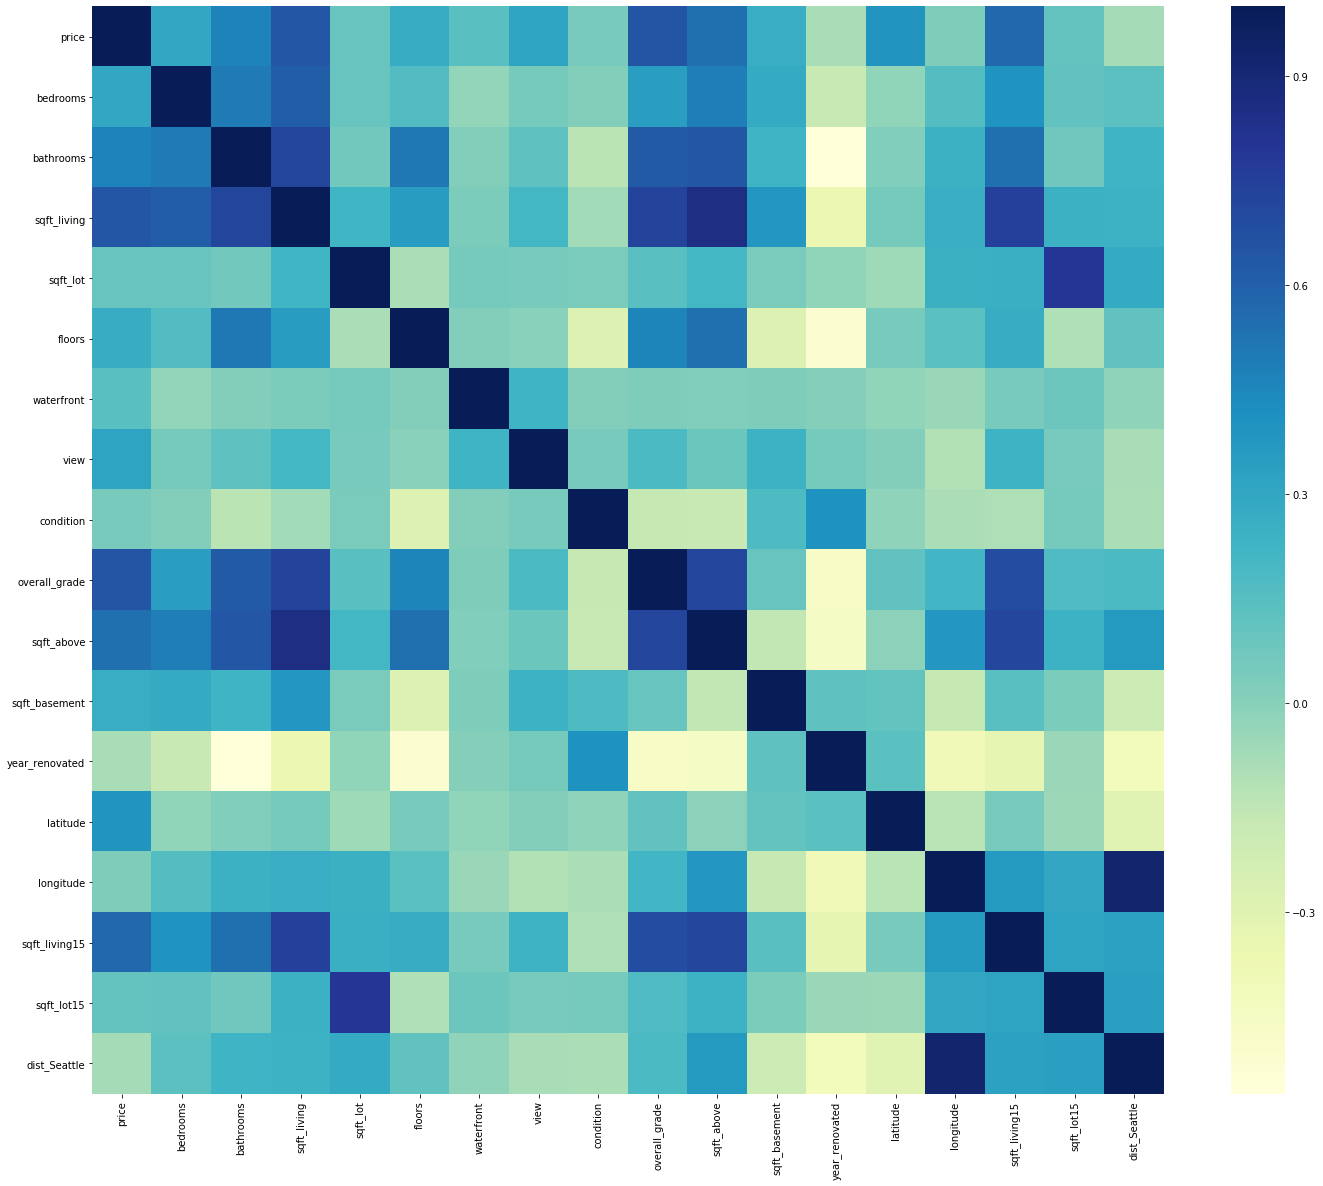

In [24]:
plt.figure(figsize=(24, 20))
ax = sns.heatmap(house.corr(), cmap="YlGnBu")

# Task 2

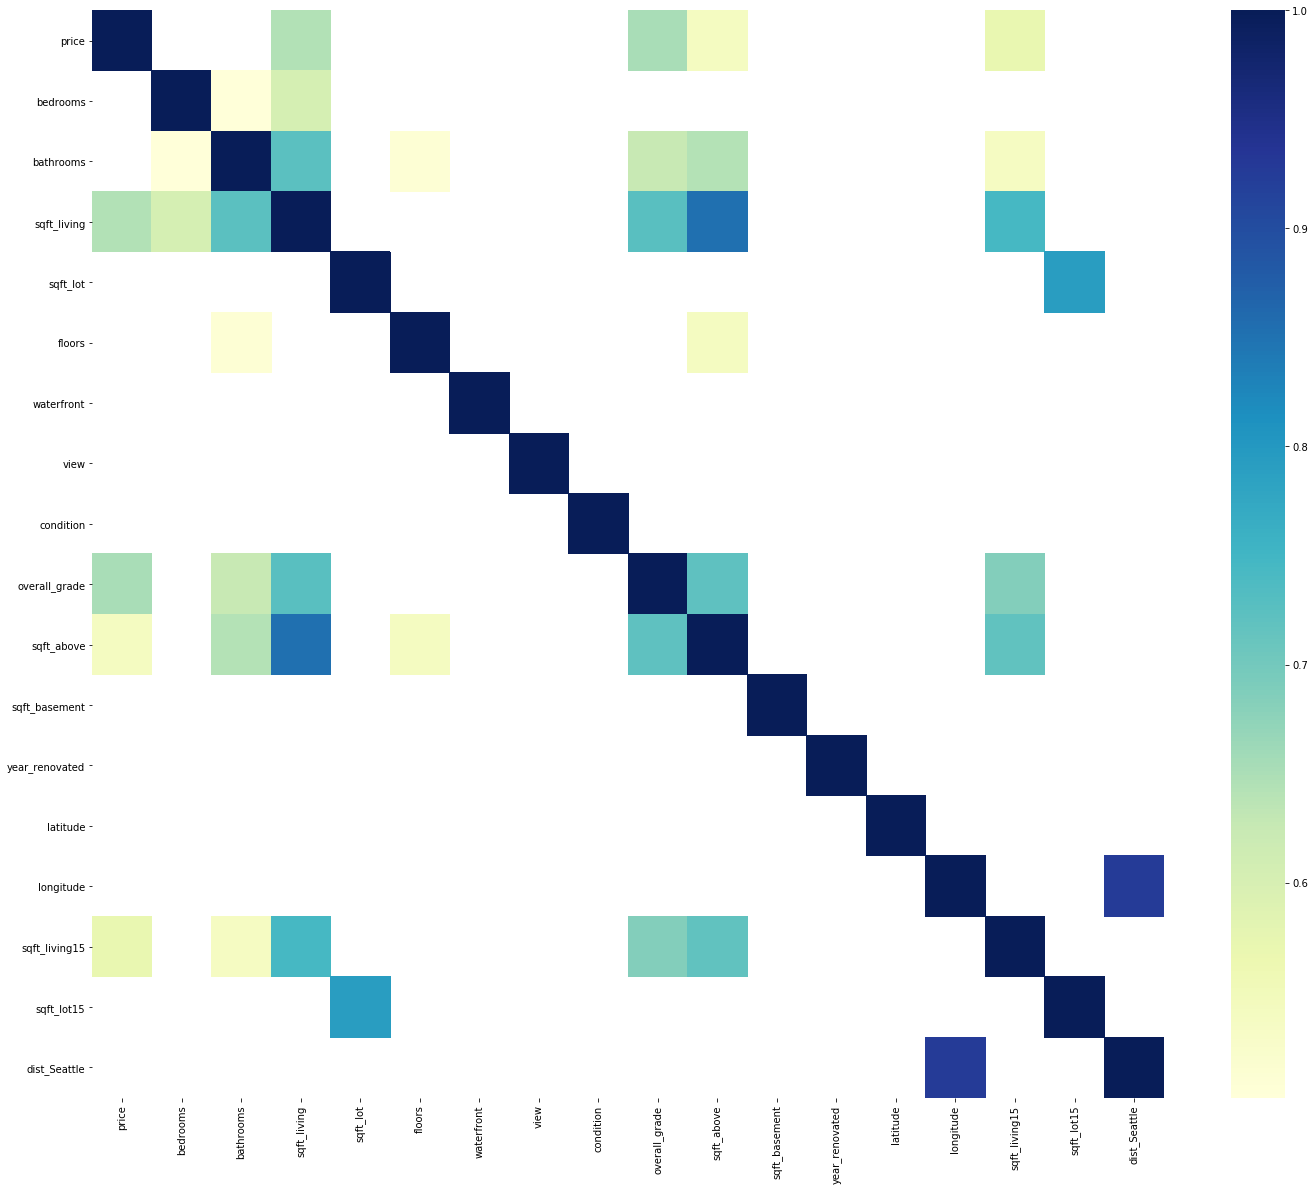

In [25]:
plt.figure(figsize=(24, 20))
sns.heatmap(house.corr()[house.corr()>0.5], cmap="YlGnBu")

In [26]:
# house.corr()["sqft_lot15"]["sqft_lot"]
# house.corr()["sqft_living15"]["sqft_living"]
# house.corr()["year_renovated"]["year_built"]
# house.corr()["overall_grade"].sort_values(ascending=False)

In [27]:
print(abs(house.corr()[TARGET]).sort_values(ascending=False))

price             1.000000
overall_grade     0.652371
sqft_living       0.644041
sqft_living15     0.569690
sqft_above        0.538425
bathrooms         0.469556
latitude          0.395468
view              0.315358
bedrooms          0.304220
floors            0.269090
sqft_basement     0.266710
waterfront        0.145471
sqft_lot15        0.108396
sqft_lot          0.100567
year_renovated    0.089599
dist_Seattle      0.076627
condition         0.044891
longitude         0.028964
Name: price, dtype: float64


In [28]:
def evaluate_linear_regression(y_test, y_pred, sample_size, variable_size):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = sqrt(MSE)
    R_square = r2_score(y_test,y_pred)
    
    Adj_R_square = 1-(1-R_square)*(sample_size-1)/(sample_size-variable_size-1)

    print("Mean Squared Error : {0:.3f}".format(MSE))
    print("RMSE : {0:.3f}".format(RMSE))
    print("R^2 : {0:.3f}".format(R_square))
    print("Adj_R_square: {0:.3f}".format(Adj_R_square))


def Plot_resid(y_test, y_pred):
    """
    
    """
    
    resid = y_test-y_pred
    
    plt.figure(figsize = (16,9))
    plt.scatter(y_pred,resid)
    plt.axhline(0,0,1, color="g", ls="--")
    plt.xlabel("Fitted")
    plt.ylabel("Residual")
    plt.title("Residual Plot")
    plt.savefig("Residual plot ols")
    plt.show()

def train_and_predict(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    ols = LinearRegression(fit_intercept=True)
    reg = ols.fit(X_train, y_train)

    print("Coef of the regression: ", reg.coef_)
    print("Intercept of the regression: ", reg.intercept_)

    y_pred = ols.predict(X_test)
    
    return y_test, y_pred
    


def linear_regression(df, selected_features, TARGET):
    
    X = df[selected_features]
    y = df[TARGET]
    y_test, y_pred = train_and_predict(X, y)  
    evaluate_linear_regression(y_test, y_pred, len(X), len(df.columns))
    Plot_resid(y_test, y_pred)

Coef of the regression:  [9.51552168e+01 2.42592981e+04 1.13542943e+05]
Intercept of the regression:  -588617.4106618217
Mean Squared Error : 38475071907.556
RMSE : 196150.636
R^2 : 0.468
Adj_R_square: 0.467


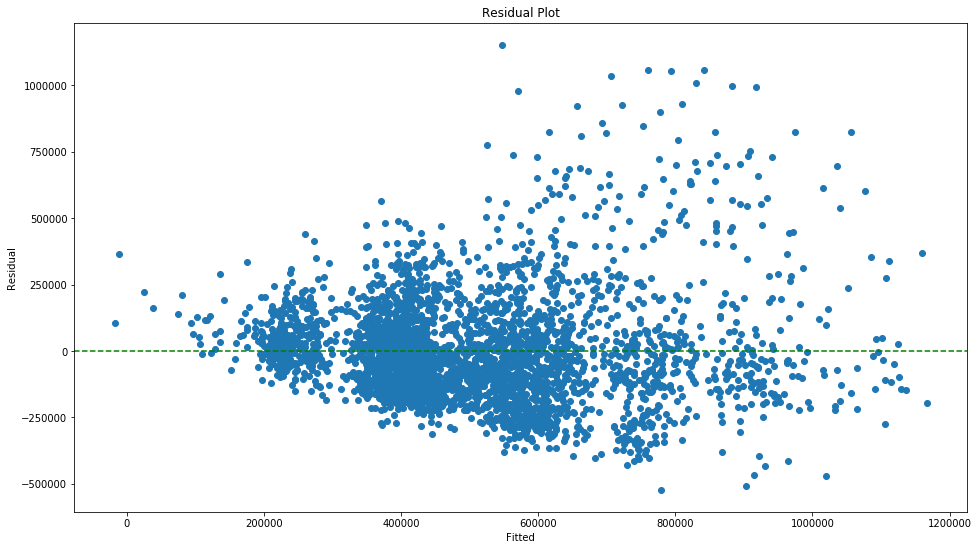

In [29]:
selected_features = ["sqft_living15", "bathrooms", "overall_grade"]
linear_regression(house, selected_features, TARGET)

# Task 3

In [30]:
get_status(house)

price  bedrooms  bathrooms  sqft_living      sqft_lot  floors  \
median  4.435000e+05     3.000      2.250     1880.000  7.419000e+03   1.000   
mad     1.988149e+05     0.709      0.586      625.419  5.903146e+03   0.486   
var     7.140920e+10     0.748      0.505   605432.435  1.367552e+08   0.289   
std     2.672250e+05     0.865      0.711      778.095  1.169424e+04   0.538   
skew    1.633000e+00     0.228      0.125        0.698  5.240000e+00   0.652   
kurt    3.784000e+00     0.358     -0.267        0.173  3.928100e+01  -0.444   

        waterfront   view  condition  overall_grade  sqft_above  \
median       0.000  0.000      3.000          7.000    1530.000   
mad          0.010  0.160      0.558          0.866     580.431   
var          0.005  0.080      0.415          1.150  528948.137   
std          0.070  0.283      0.644          1.072     727.288   
skew        14.147  2.910      1.122          0.573       1.002   
kurt       198.157  6.471      0.358          0.639       0.546   

        sqft_basement  year_renovated  latitude  longitude  sqft_living15  \
median          0.000          42.000    47.573   -122.242       1810.000   
mad           344.216          24.101     0.115      0.109        499.136   
var        167788.494         833.280     0.019      0.017     391500.350   
std           409.620          28.867     0.139      0.131        625.700   
skew            1.307           0.518    -0.486      0.673          0.860   
kurt            0.652          -0.565    -0.700     -0.155          0.456   

          sqft_lot15  dist_Seattle  
median  7.500000e+03        15.365  
mad     4.539200e+03         9.401  
var     6.669423e+07       136.162  
std     8.166654e+03        11.669  
skew    3.504000e+00         0.996  
kurt    1.478300e+01         0.632

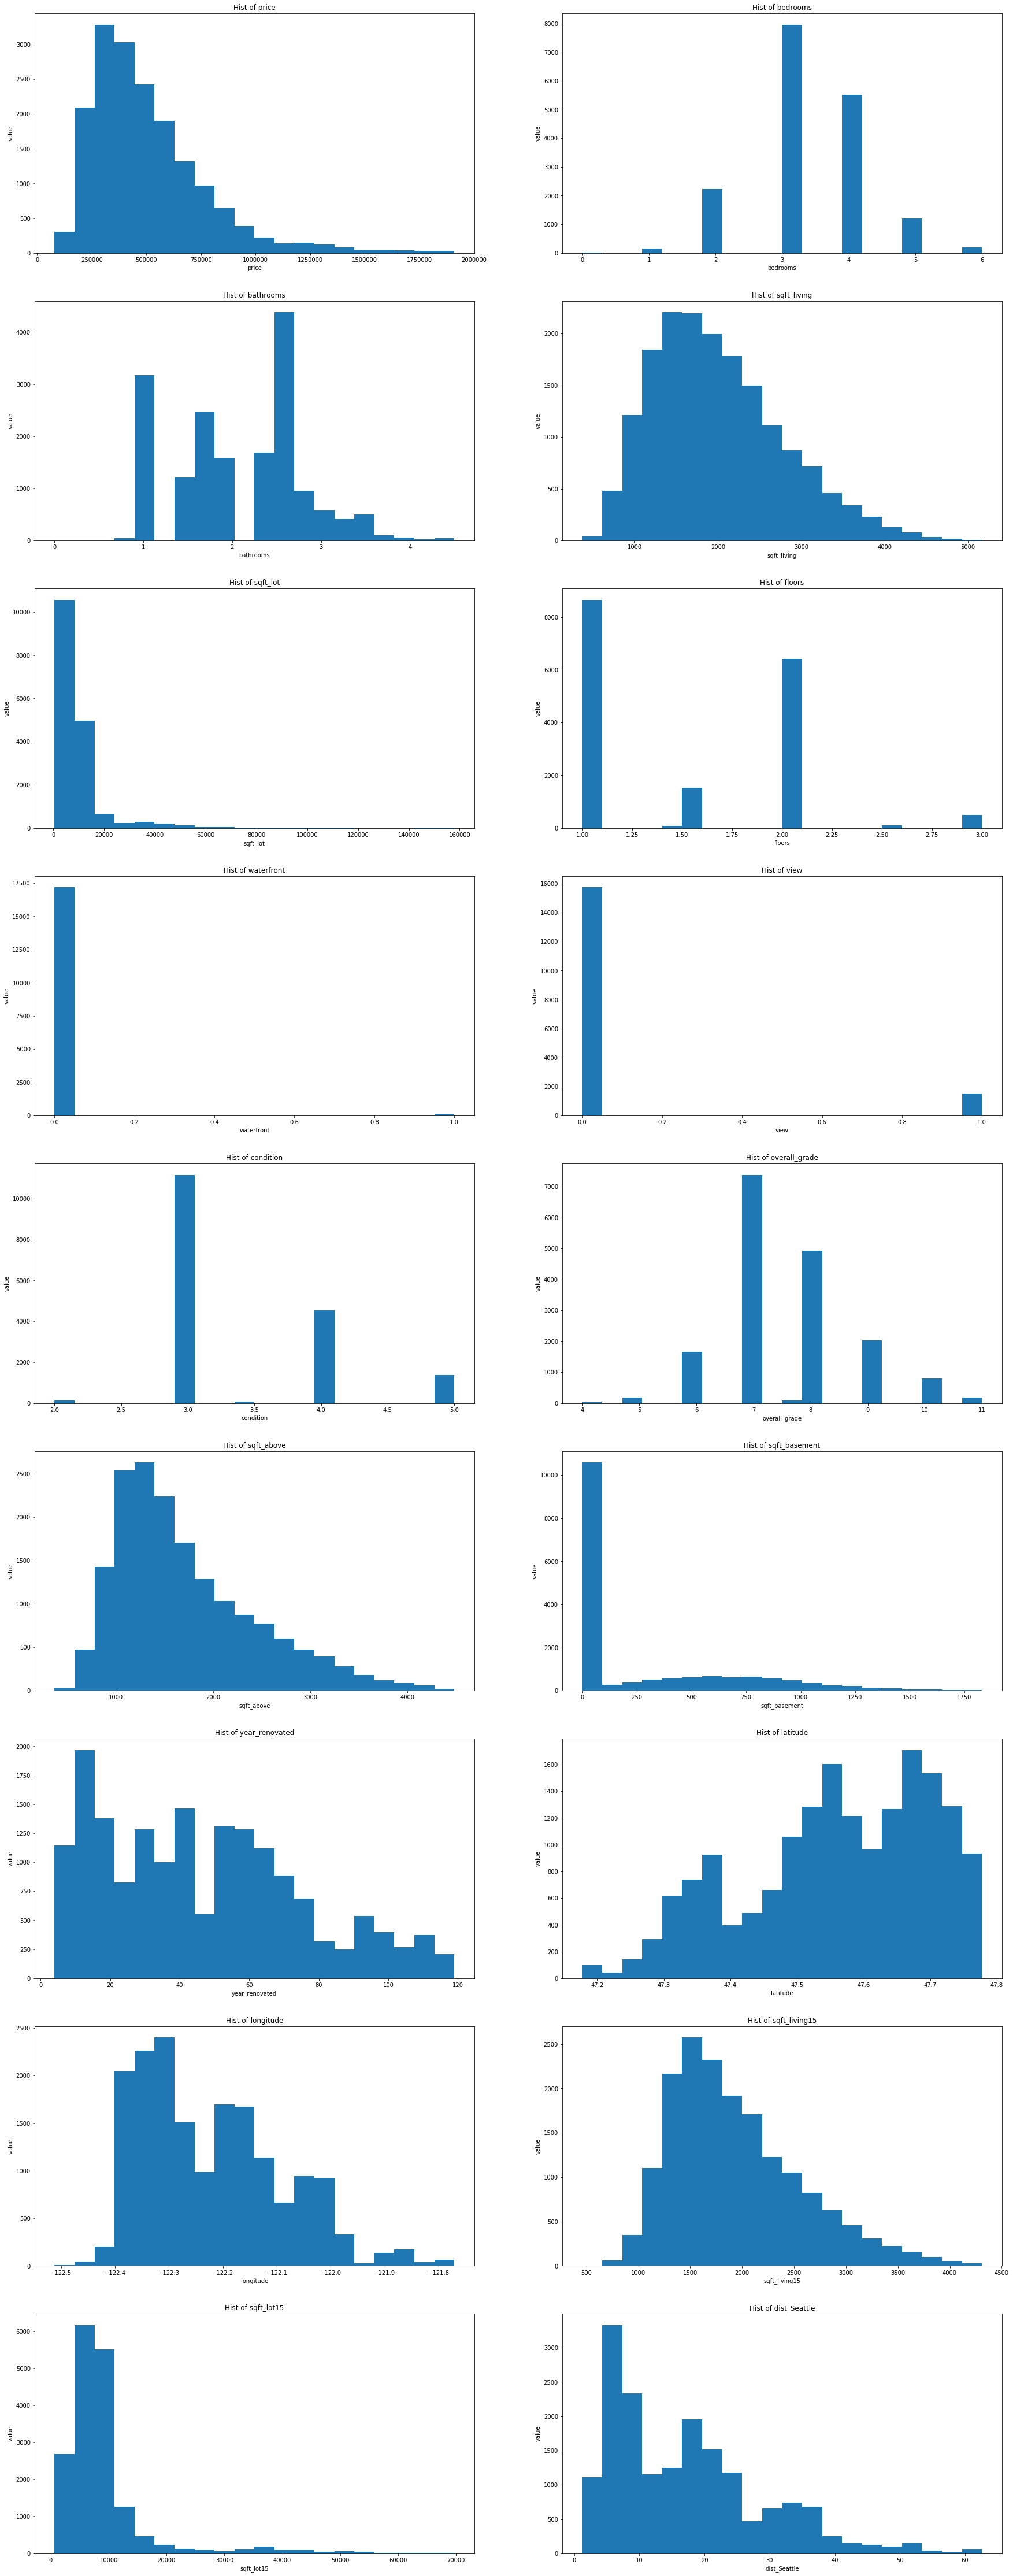

In [31]:
def _hist(df, col):
    
    plt.hist(house[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("value")
        
    items = ["Hist of ", col]
    title = ''.join(items)
    plt.title(title)


def subplot_hist(df):
    plt.figure(figsize=(30,90))
    num_subplot = len(df.columns)
    for i, col in enumerate(house.columns):
        plt.subplot(num_subplot//2 + 1,2,i+1)
        _hist(df, col)
        
subplot_hist(house)


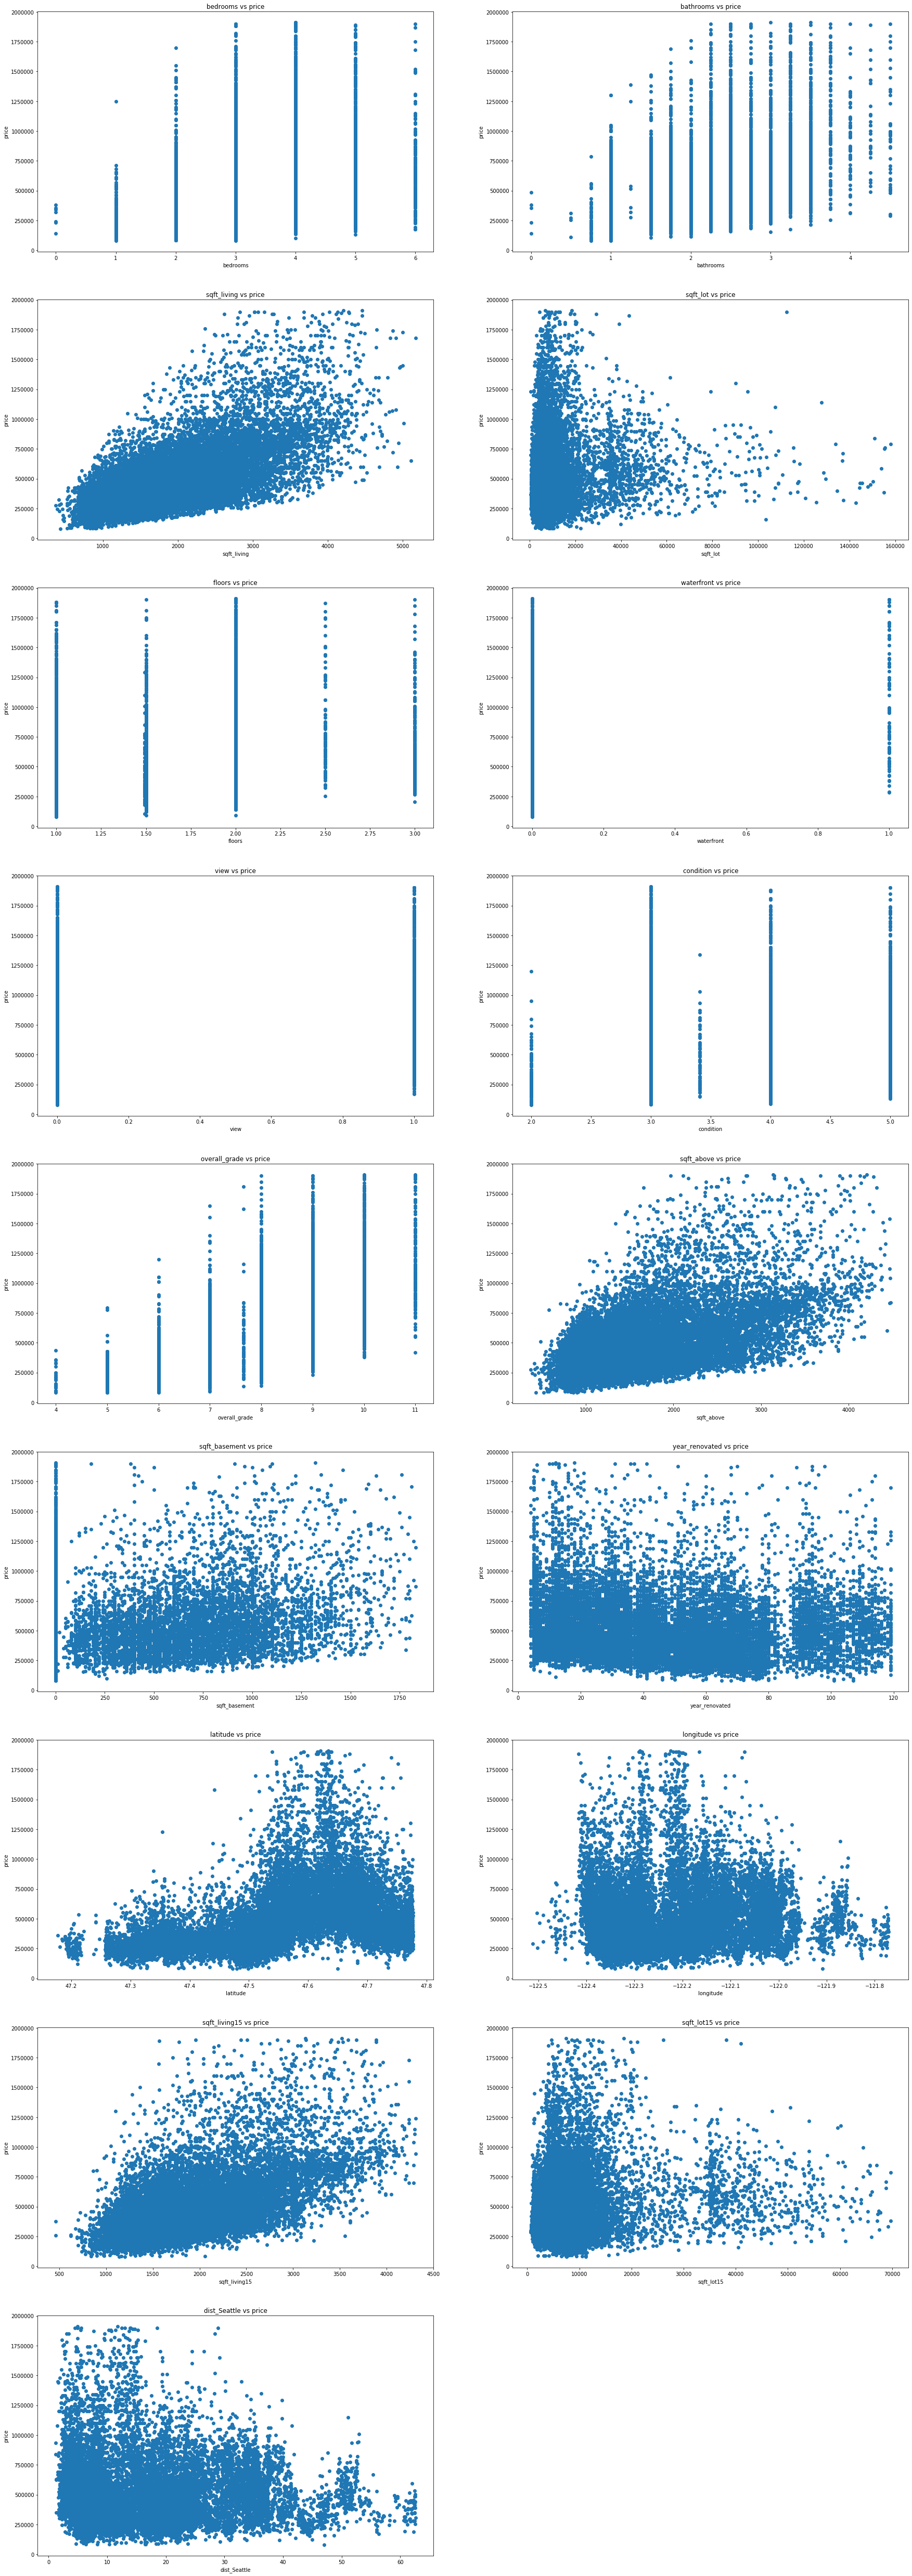

In [32]:
subplot_scatter(house, TARGET)

In [33]:
high_skew_cols = ["price", "sqft_living", "sqft_above","condition", "sqft_living15", "sqft_basement", "floors","dist_Seattle"]
cols = ["sqft_lot", "sqft_lot15"]
for col in high_skew_cols:
    house[col] = np.log1p(house[col])
    
for col in cols:
    house[col] = np.sqrt(np.sqrt(np.sqrt(house[col])))

In [34]:
get_status(house)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
median  13.002     3.000      2.250        7.540     3.046   0.693   
mad      0.392     0.709      0.586        0.324     0.202   0.195   
var      0.237     0.748      0.505        0.159     0.085   0.044   
std      0.487     0.865      0.711        0.398     0.292   0.209   
skew     0.120     0.228      0.125       -0.220     0.676   0.405   
kurt    -0.074     0.358     -0.267       -0.308     2.429  -1.232   

        waterfront   view  condition  overall_grade  sqft_above  \
median       0.000  0.000      1.386          7.000       7.334   
mad          0.010  0.160      0.121          0.866       0.332   
var          0.005  0.080      0.019          1.150       0.164   
std          0.070  0.283      0.137          1.072       0.404   
skew        14.147  2.910      0.887          0.573       0.160   
kurt       198.157  6.471      0.011          0.639      -0.518   

        sqft_basement  year_renovated  latitude  longitude  sqft_living15  \
median          0.000          42.000    47.573   -122.242          7.502   
mad             3.048          24.101     0.115      0.109          0.255   
var             9.908         833.280     0.019      0.017          0.098   
std             3.148          28.867     0.139      0.131          0.313   
skew            0.492           0.518    -0.486      0.673          0.120   
kurt           -1.708          -0.565    -0.700     -0.155         -0.358   

        sqft_lot15  dist_Seattle  
median       3.051         2.795  
mad          0.180         0.582  
var          0.066         0.455  
std          0.258         0.674  
skew         0.487        -0.131  
kurt         2.029        -0.912

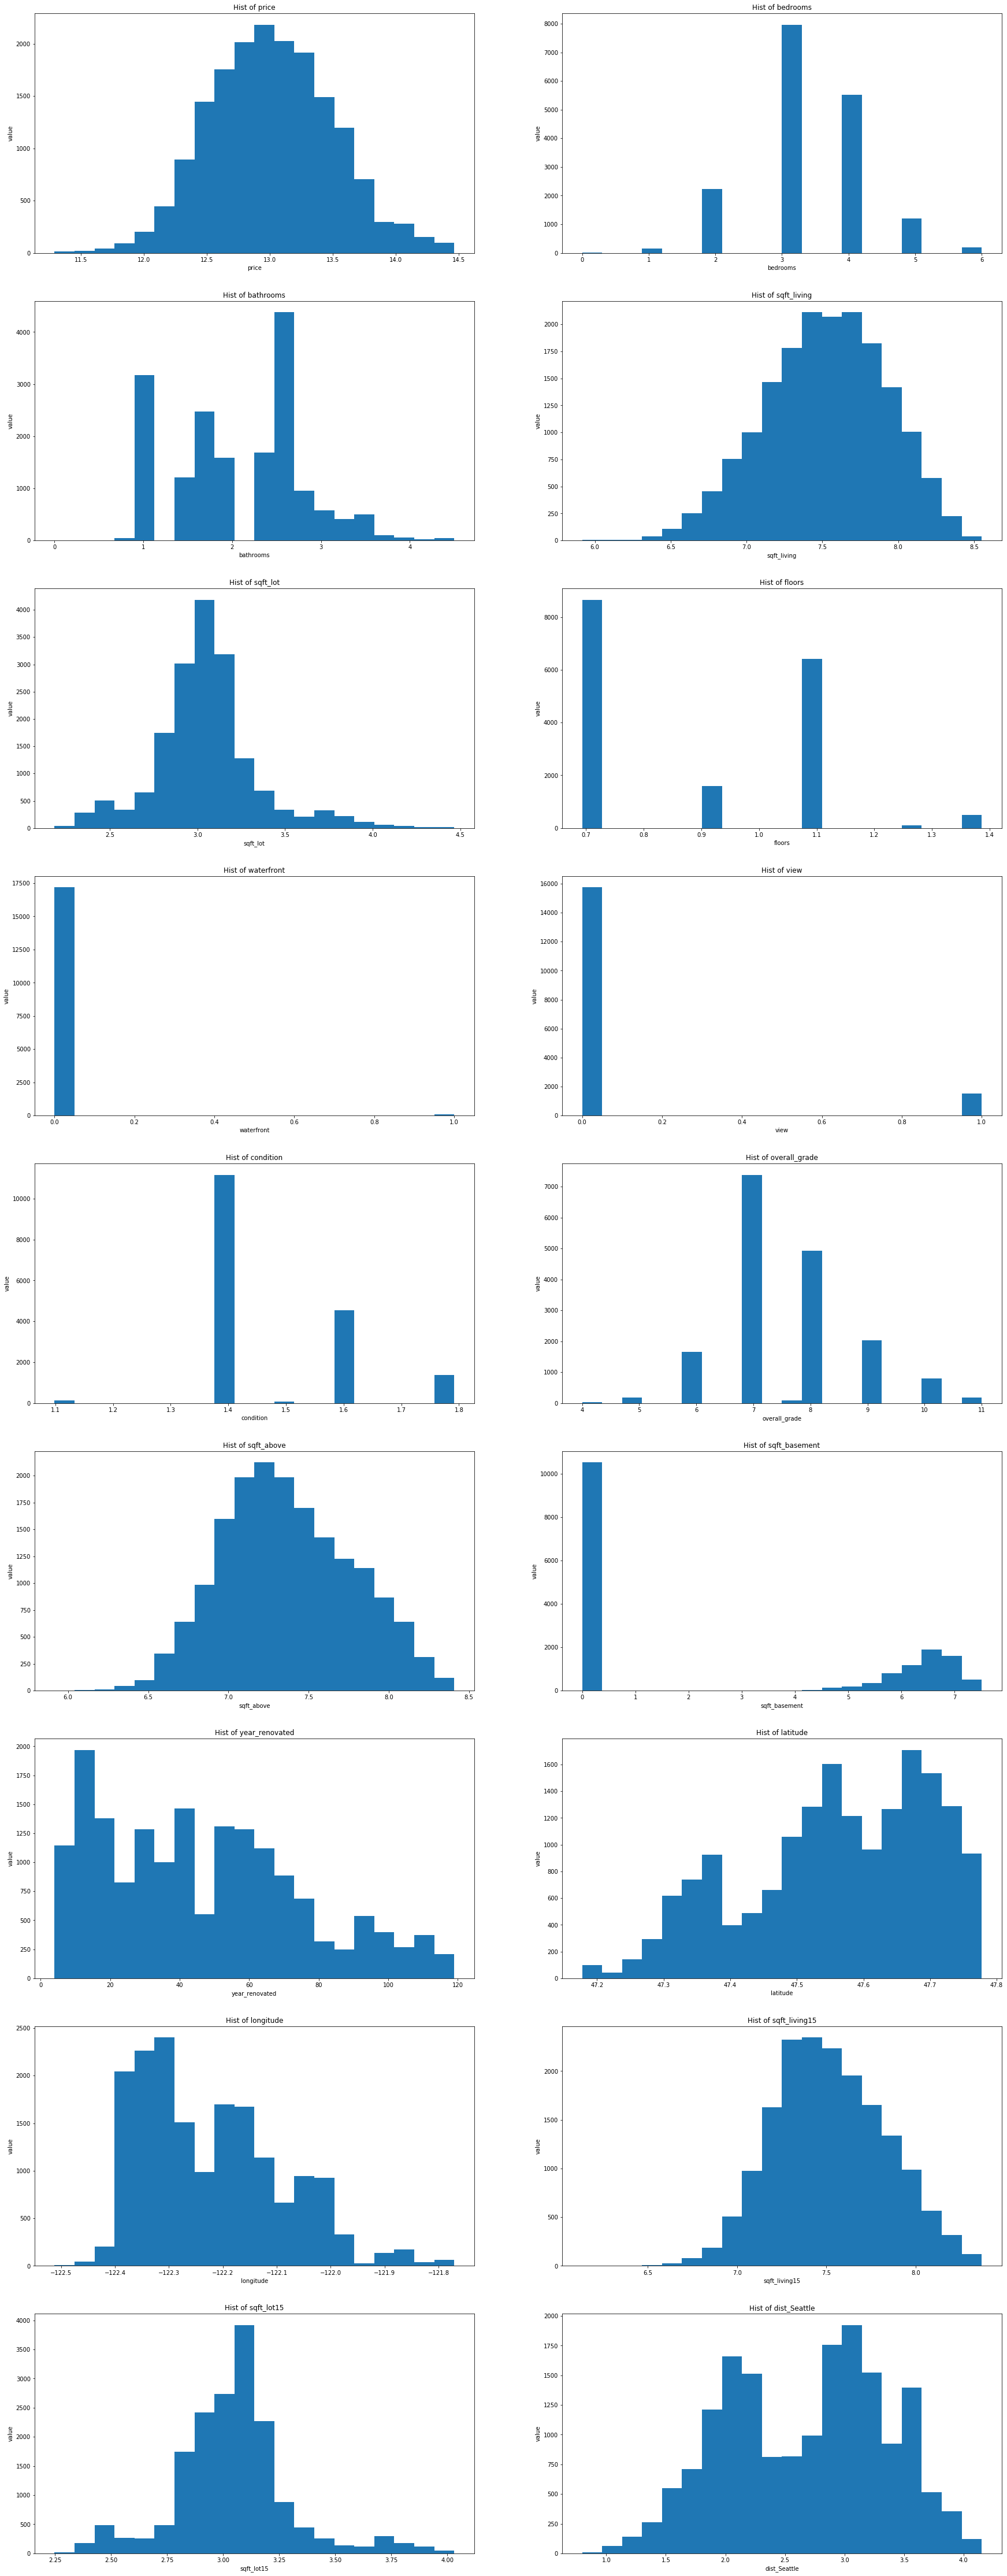

In [35]:
subplot_hist(house)

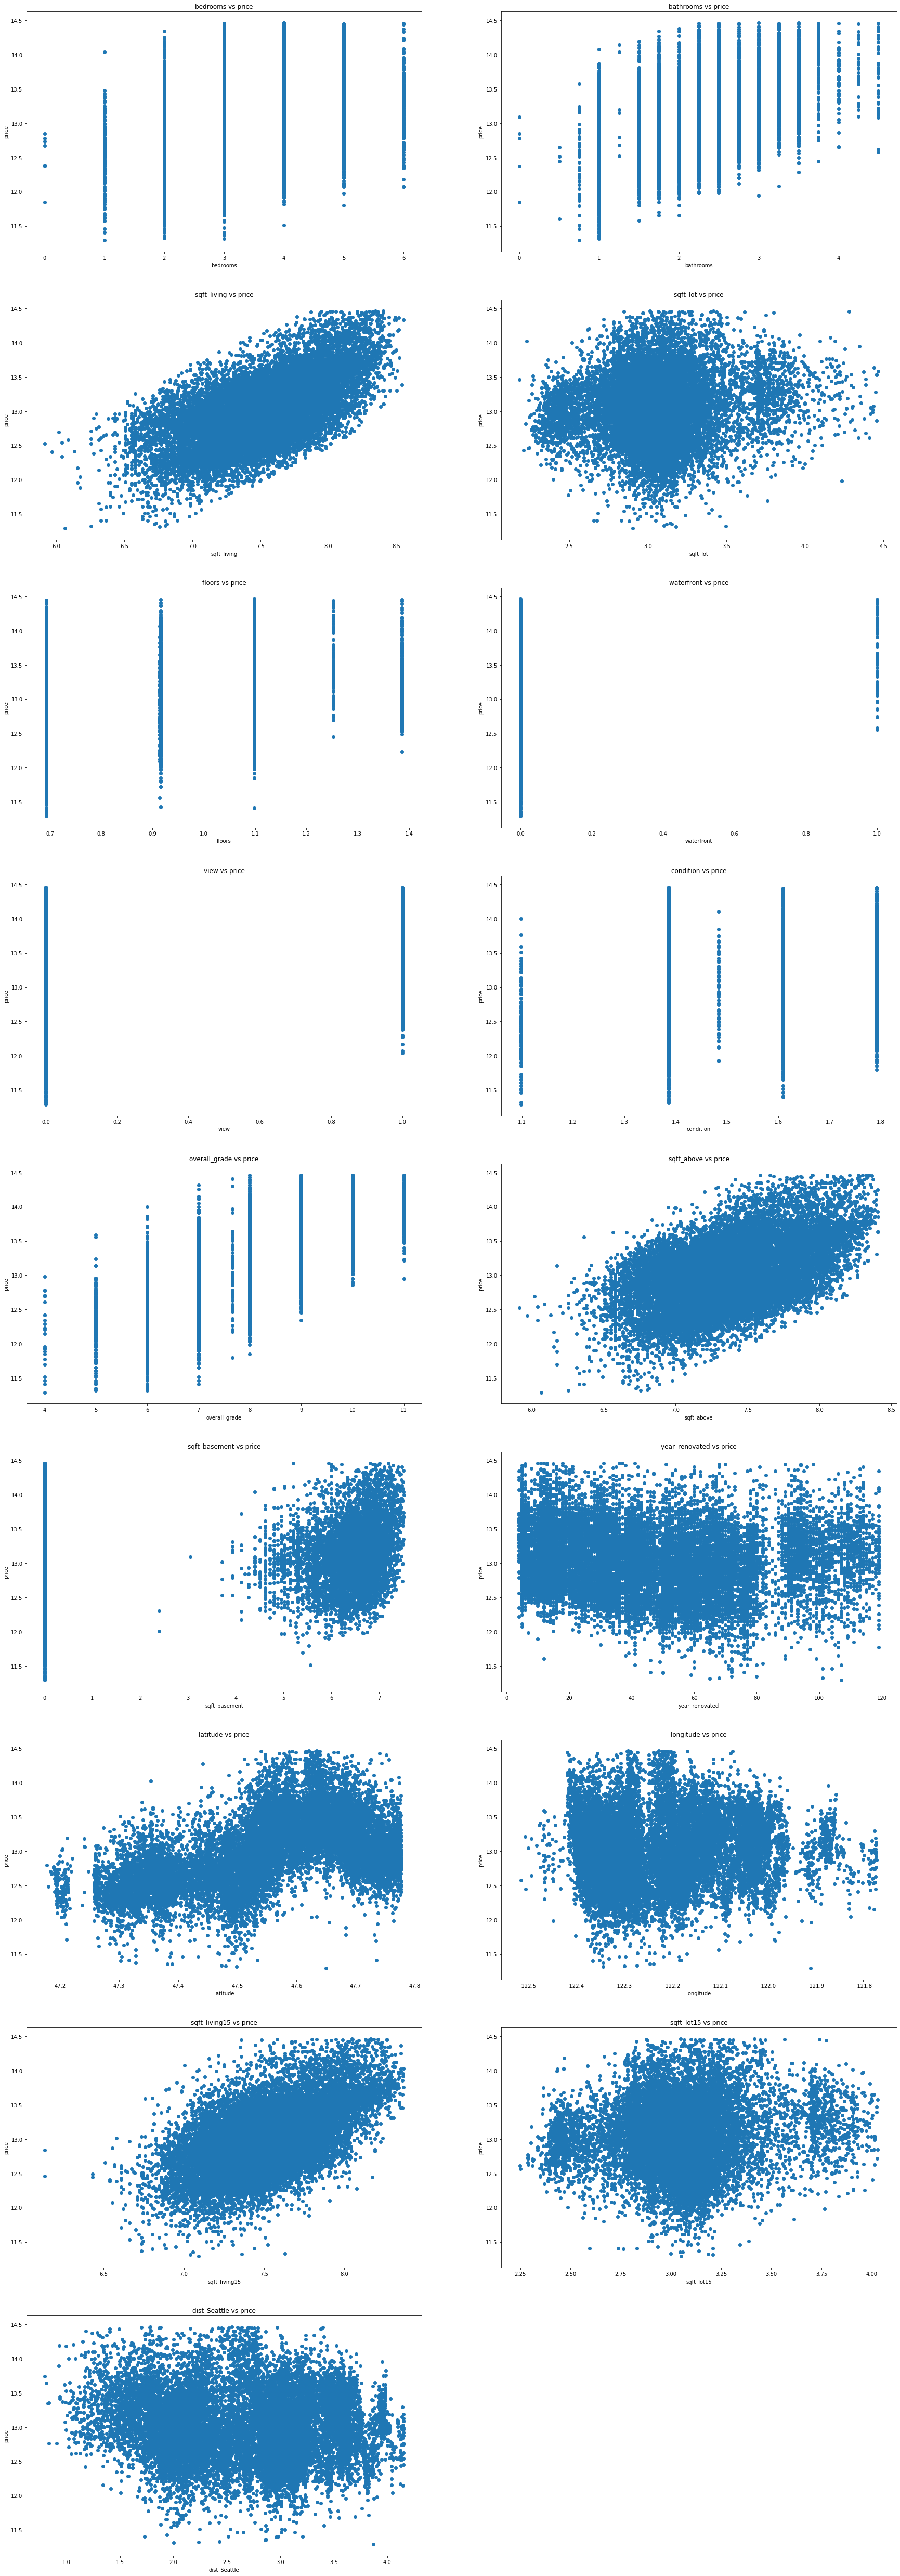

In [36]:
subplot_scatter(house, TARGET)

In [82]:
abs(house.corr()[TARGET]).sort_values(ascending=False)

price             1.000000
overall_grade     0.657722
sqft_living       0.629159
sqft_living15     0.569270
sqft_above        0.530375
latitude          0.492170
bathrooms         0.491042
bedrooms          0.317740
floors            0.303376
view              0.284075
sqft_basement     0.224436
waterfront        0.107076
year_renovated    0.106291
dist_Seattle      0.101590
sqft_lot          0.080256
sqft_lot15        0.072686
longitude         0.053642
condition         0.039794
Name: price, dtype: float64

In [83]:
all_features = house.columns.drop(TARGET)
selected_features = all_features.drop(["sqft_lot","sqft_living"])

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'overall_grade', 'sqft_above', 'sqft_basement', 'year_renovated',
       'latitude', 'longitude', 'sqft_living15', 'sqft_lot15', 'dist_Seattle'],
      dtype='object')
Coef of the regression:  [-0.01724268  0.04831002 -0.02205835  0.49940459  0.1652256   0.37162072
  0.14419702  0.36679202  0.02103226  0.00175303  1.22557973  0.76502193
  0.25489084 -0.04992471 -0.21688508]
Intercept of the regression:  42.528936652323395
Mean Squared Error : 0.058
RMSE : 0.241
R^2 : 0.756
Adj_R_square: 0.756


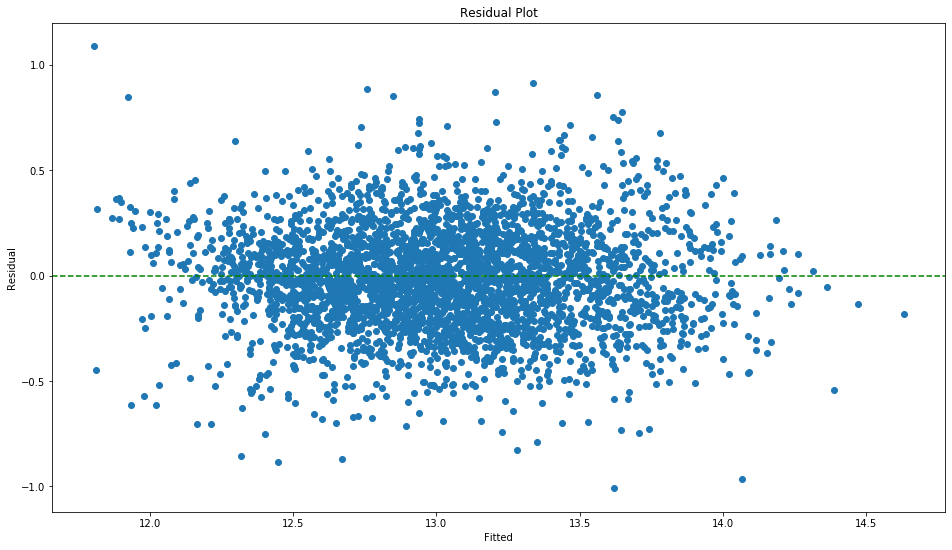

In [84]:
# for col in selected_features:
#     print(col)
#     selected_features = selected_features.drop(col)
print(selected_features)
linear_regression(house, selected_features, TARGET)